# Q Learning

$Q_{s,a} = (1-\alpha).Q_{s,a} + \alpha \left( R_{s,a} + \gamma . max(Q_{s',a'})\right)$

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import gym
import numpy as np
from gym.envs.registration import register
from gym import wrappers
import shutil

In [27]:
# register(
#     id='FrozenLakeNotSlippery-v0',
#     entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name' : '4x4', 'is_slippery': False},
#     max_episode_steps=100,
#     reward_threshold=0.78, # optimum = .8196
# )

# env = gym.make('FrozenLakeNotSlippery-v0')


In [28]:
env = gym.make('FrozenLake-v0')
shutil.rmtree('/tmp/FrozenLake_01') 
env = wrappers.Monitor(env, '/tmp/FrozenLake_01')

[2017-09-30 10:59:04,927] Making new env: FrozenLake-v0
[2017-09-30 10:59:04,944] Creating monitor directory /tmp/FrozenLake_01


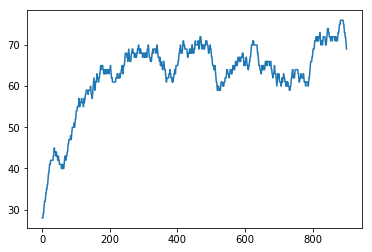

In [54]:
Q= np.zeros((env.observation_space.n, env.action_space.n)) #16x4
alpha=0.1
beta=0.001
gamma=0.95
num_episodes = 1000
reward_list=[]
for i in range(num_episodes):
    s = env.reset();
    done=False
    while done==False:
        if np.random.rand() < beta:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        s_next,reward,done,info = env.step(a)
        if done:#reaching goal or falling into a hole
            r = 1.0 if reward > 0.0 else -1.0
        else:#reaching maximum step
            r = 0.0
        Q[s,a]= (1-alpha)*Q[s,a] + alpha*( r + gamma*np.max(Q[s_next,:]) )
        if done == True:
            break
        s=s_next
    reward_list.append(reward)
                                        
plt.plot(np.convolve(np.ones(100),reward_list,"valid"))

In [43]:
print "Final Q-Table Values"
print Q

Final Q-Table Values
[[-0.08041291 -0.07686315  0.01956813 -0.07395142]
 [-0.27724063 -0.18402443 -0.29708084 -0.0196337 ]
 [-0.21451319 -0.13729068 -0.18774763 -0.04093986]
 [-0.38149807 -0.37299411 -0.34688186 -0.05032877]
 [ 0.07167062 -0.11970383 -0.21816553 -0.5266299 ]
 [ 0.          0.          0.          0.        ]
 [-0.47521462 -0.67649464 -0.65632438 -0.65193146]
 [ 0.          0.          0.          0.        ]
 [-0.39502844 -0.1915895  -0.25837472  0.16881495]
 [-0.50956079  0.2306468  -0.08833601 -0.22671156]
 [ 0.29653168 -0.31187918 -0.39833744 -0.50653472]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.04112495  0.13683403  0.44385894 -0.25747738]
 [ 0.32365543  0.74185243  0.36765303  0.31417209]
 [ 0.          0.          0.          0.        ]]


In [39]:
s = env.reset()
d=False
n=0
while d==False:
    n+=1
    a = np.argmax(Q[s,:])
    s,r,d,x = env.step(a)
    #print("%s %s %s %s"%(s,r,d,x))
    env.render()
print n

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
F

In [36]:
env.close()
#gym.upload('/tmp/FrozenLake_01', api_key='sk_o9OoYpSkKamkW8MrKuHw')